# ML Models

# 1.- Libraries, functions

In [26]:
from influxdb import DataFrameClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import requests 
from datetime import datetime, timedelta
import time
import ast
import matplotlib.transforms as mtransforms

In [27]:
def query_generator(query_type, start_time, end_time, exchanges = None, rest = True):
    if query_type == "Partial":
        query = r"SELECT "
        for element in exchanges:
            query += '"Q ' + element + '",'
            query += '"LastTrade ' + element + '",'
            query += '"OrderBookPrice ' + element + '",'
        query += " Maximum FROM Dataset WHERE time >= " + str(start_time) + " time <= " + str(end_time)
    elif query_type == "All":
        query = "SELECT * FROM Dataset WHERE time >= " + str(start_time) + "and time <= " + str(end_time)
    return query

# 2.- Setup

In [28]:
client = DataFrameClient('localhost', 8086, 'root', 'root')
client.switch_database("SecondM")

In [29]:
exchanges = ["Binance", "Bitfinex", "Bithumb", "Bitstamp", "Coinbase", "Huobi", "Kraken"]
q = query_generator("All", "'2020-05-21 16:04:00.000000'", "'2020-05-21 16:19:00.0000000'", exchanges)

In [37]:
points_dif = client.query(q)["Dataset"]

filter_col = [col for col in points_dif if (col.startswith('Order'))]
points_dif["Average"] = points_dif[filter_col].apply(lambda row: np.mean(row)*0.002, axis=1)

filter_col = [col for col in points_dif if col.startswith('Order')]
points_dif["MaxExch"] = points_dif[filter_col].apply(lambda row: sorted([row.idxmax()[15::], row.idxmin()[15::]])[0], axis=1)
points_dif["MinExch"] = points_dif[filter_col].apply(lambda row: sorted([row.idxmax()[15::], row.idxmin()[15::]])[1], axis=1)

points_dif = points_dif.loc[:, points_dif.columns != 'Batch_ID']
points_dif

,LastTrade_Binance,LastTrade_Bitfinex,LastTrade_Bitstamp,LastTrade_Coinbase,LastTrade_Huobi,LastTrade_Kraken,Maximum,OrderBookPrice Binance,OrderBookPrice Bitfinex,OrderBookPrice Bithumb,...,Quan_A_9_Binance,Quan_A_9_Bitfinex,Quan_A_9_Bithumb,Quan_A_9_Bitstamp,Quan_A_9_Coinbase,Quan_A_9_Huobi,Quan_A_9_Kraken,Average,MaxExch,MinExch
2020-05-21 16:04:47.428157952+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000044,Bitstamp,Bitstamp
2020-05-21 16:04:47.693092096+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000044,Bitstamp,Bitstamp
2020-05-21 16:04:48.021548032+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000044,Bitstamp,Bitstamp
2020-05-21 16:04:48.285448960+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000044,Bitstamp,Bitstamp
2020-05-21 16:04:48.570487040+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000044,Bitstamp,Bitstamp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-21 16:17:29.814000128+00:00,0.022094,0.022092,0.022091,0.0221,0.022094,0.02209,0.000023,0.022093,0.022085,0.022074,...,9.051,5.0,0.0,4.657115,5.7169,42.552,59.73464,0.000044,Bithumb,Bitstamp
2020-05-21 16:17:29.827346944+00:00,0.022094,0.022092,0.022091,0.0221,0.022094,0.02209,0.000023,0.022093,0.022085,0.022074,...,9.051,5.0,0.0,14.000000,5.7169,42.552,59.73464,0.000044,Bithumb,Bitstamp
2020-05-21 16:17:29.860000+00:00,0.022099,0.022092,0.022091,0.0221,0.022094,0.02209,0.000023,0.022093,0.022085,0.022074,...,9.051,5.0,0.0,14.000000,5.7169,42.552,59.73464,0.000044,Bithumb,Bitstamp
2020-05-21 16:17:29.860999936+00:00,0.022099,0.022092,0.022091,0.0221,0.022094,0.02209,0.000023,0.022093,0.022085,0.022074,...,9.051,5.0,0.0,14.000000,5.7169,42.552,59.73464,0.000044,Bithumb,Bitstamp


In [36]:
points_dif = points_dif.iloc[:,~0]
points_dif

2020-05-21 16:04:47.428157952+00:00    Bitstamp
2020-05-21 16:04:47.693092096+00:00    Bitstamp
2020-05-21 16:04:48.021548032+00:00    Bitstamp
2020-05-21 16:04:48.285448960+00:00    Bitstamp
2020-05-21 16:04:48.570487040+00:00    Bitstamp
                                         ...   
2020-05-21 16:17:29.814000128+00:00    Bitstamp
2020-05-21 16:17:29.827346944+00:00    Bitstamp
2020-05-21 16:17:29.860000+00:00       Bitstamp
2020-05-21 16:17:29.860999936+00:00    Bitstamp
2020-05-21 16:17:29.964000+00:00       Bitstamp
Name: MinExch, Length: 12722, dtype: object

# 3.- Exploratory data analysis

In [20]:
points_dif.groupby("MaxExch").agg({'Q_Binance' : np.size,'Average' : [np.mean]})

,Q_Binance,Average
,size,mean
MaxExch,,
Binance,2556.0,0.000044
Bitfinex,1627.0,0.000044
Bithumb,6362.0,0.000044
Bitstamp,2320.0,0.000044
Coinbase,770.0,0.000044
Huobi,38.0,0.000044


In [21]:
points_dif.groupby("MinExch").agg({'Q_Binance' : np.size,'Average' : [np.mean]})

,Q_Binance,Average
,size,mean
MinExch,,
Bithumb,1708.0,0.000044
Bitstamp,4965.0,0.000044
Coinbase,1632.0,0.000044
Huobi,1962.0,0.000044
Kraken,3406.0,0.000044


In [22]:
np.unique(points_dif[["MaxExch"]])

array(['Binance', 'Bitfinex', 'Bithumb', 'Bitstamp', 'Coinbase', 'Huobi'],
      dtype=object)

In [23]:
ma = points_dif[["Maximum"]]
state = points_dif[["MaxExch", "MinExch"]]
colors = [[(254/255,255/255,191/255)],
          [(252/255,220/255,223/255)],
          [(176/255,239/255,239/255)],
          [(244/255,152/255,194/255)],
          [(201/255,151/255,198/255)],
          [(131/255,217/255,220/255)],
          [(181/255,185/255,255/255)]]

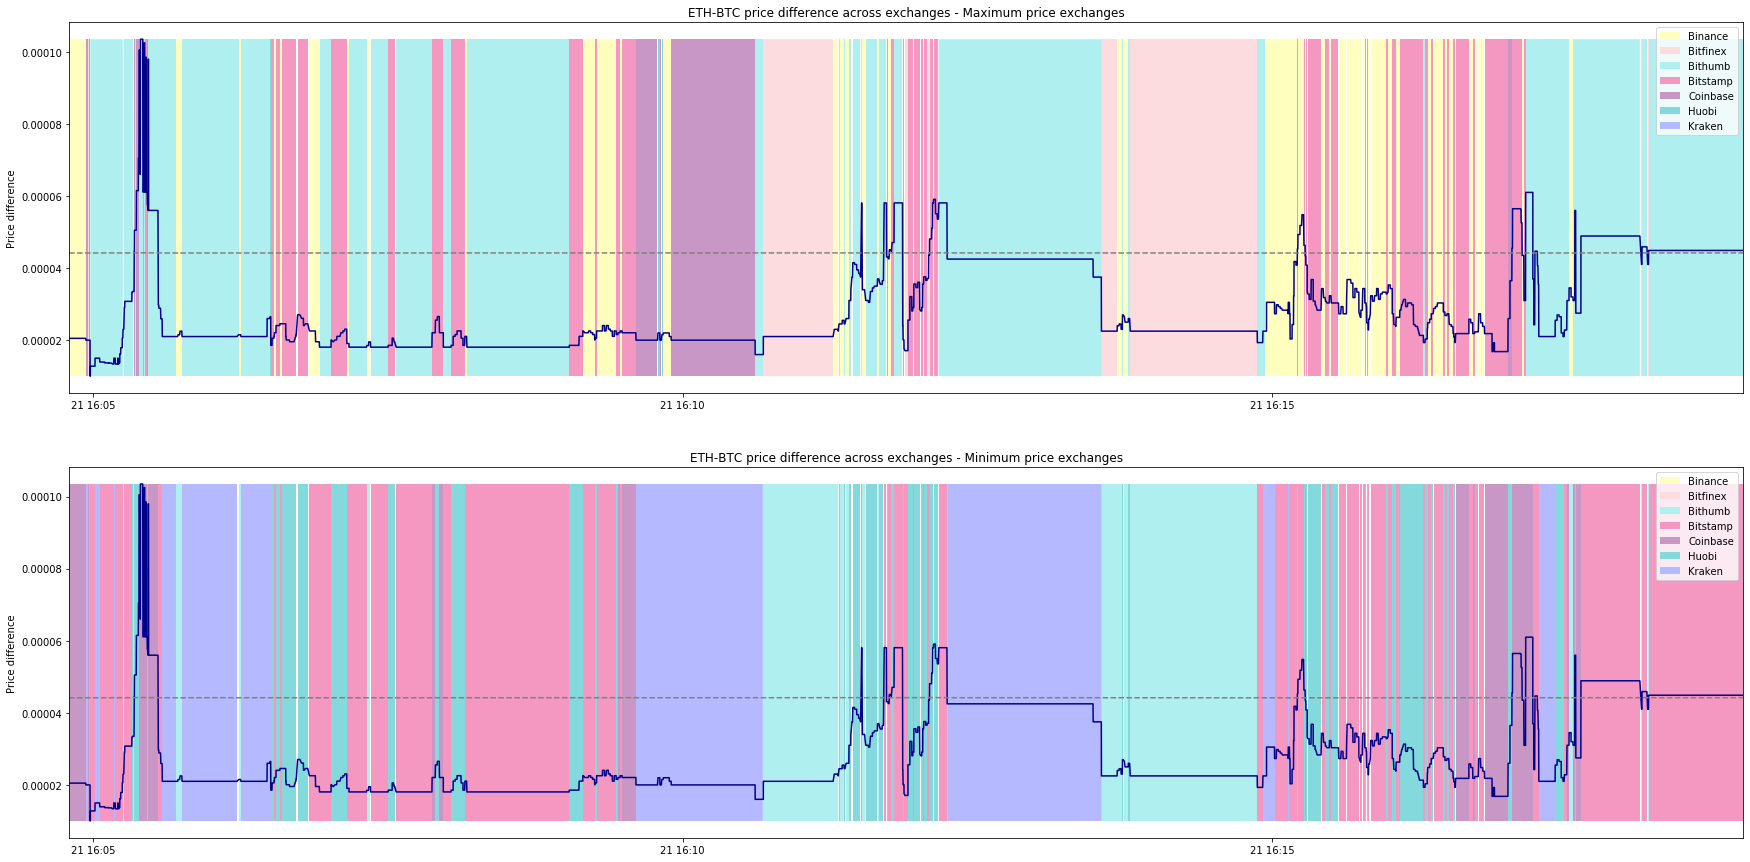

In [25]:
plt.rcParams["figure.figsize"] = (30,15)
fig, axs = plt.subplots(2)
cmap = plt.get_cmap('RdYlGn_r')
fields = ["MaxExch", "MinExch"]
names = ["Maximum", "Minimum"]

for i in range(2):
    axs[i].plot(ma,color="darkblue", linewidth=1.5, marker='',
            label='Maximum price difference')

    axs[i].set_xlabel('')
    axs[i].set_ylabel('Price difference')
    axs[i].set_title('ETH-BTC price difference across exchanges - ' + names[i]  + ' price exchanges')
    axs[i].grid(False)
    axs[i].legend(loc='upper center')
    axs[i].set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

    trans = mtransforms.blended_transform_factory(axs[i].transData, axs[i].transAxes)
    c = []
    for j in range(len(exchanges)):
        c.append(axs[i].fill_between(ma.index, np.min(ma), np.max(ma), 
                                     where=state[fields[i]]==exchanges[j],label = exchanges[j],facecolor=colors[j]))
    
    axs[i].legend([k for k in c], [c[k].get_label() for k in range(len(c))])
    axs[i].plot(points_dif[["Average"]],color='grey', linestyle = "dashed", linewidth=1.5, marker='', label='Maximum price difference')

# 2.- Stacked LSTM

In [ ]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array

In [ ]:
#RMSPROP and ADAM
# define model where LSTM is also output layer
# If differences are not significant, try to replicate the studies with different exchanges
# Different timesteps differences
# Different optimizer (ADAM - RMSPROP)
# Different retraining (Fixed, dynamic)
# Different data sctructures (All event-based)
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(...,return_sequences=True, input_shape=(...)))
model.add(dense())
model.add(softmax())
model.compile(optimizer='rmsprop', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

In [ ]:
model = Sequential()
model.add(LSTM(..., return_sequences=True, input_shape=(...)))
model.add(LSTM(...))
model.add(Dense(...))

# CNN

In [ ]:
def create_deeplob(T, NF, number_of_lstm):
    input_lmd = Input(shape=(T, NF, 1))
    
    # build the convolutional block
    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(input_lmd)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)

    conv_first1 = Conv2D(32, (1, 2), strides=(1, 2))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)

    conv_first1 = Conv2D(32, (1, 10))(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    
    # build the inception module
    convsecond_1 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    convsecond_1 = Conv2D(64, (3, 1), padding='same')(convsecond_1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)

    convsecond_2 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)
    convsecond_2 = Conv2D(64, (5, 1), padding='same')(convsecond_2)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)

    convsecond_3 = MaxPooling2D((3, 1), strides=(1, 1), padding='same')(conv_first1)
    convsecond_3 = Conv2D(64, (1, 1), padding='same')(convsecond_3)
    convsecond_3 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_3)
    
    convsecond_output = keras.layers.concatenate([convsecond_1, convsecond_2, convsecond_3], axis=3)

    # use the MC dropout here
    conv_reshape = Reshape((int(convsecond_output.shape[1]), int(convsecond_output.shape[3])))(convsecond_output)

    # build the last LSTM layer
    conv_lstm = CuDNNLSTM(number_of_lstm)(conv_reshape)

    # build the output layer
    out = Dense(3, activation='softmax')(conv_lstm)
    model = Model(inputs=input_lmd, outputs=out)
    adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

deeplob = create_deeplob(100, 40, 64)